## Neural Network - Gas Turbine Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("gas_turbines.csv")

In [3]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
AT      15039 non-null float64
AP      15039 non-null float64
AH      15039 non-null float64
AFDP    15039 non-null float64
GTEP    15039 non-null float64
TIT     15039 non-null float64
TAT     15039 non-null float64
TEY     15039 non-null float64
CDP     15039 non-null float64
CO      15039 non-null float64
NOX     15039 non-null float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

#### No Null Values in Dataset

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


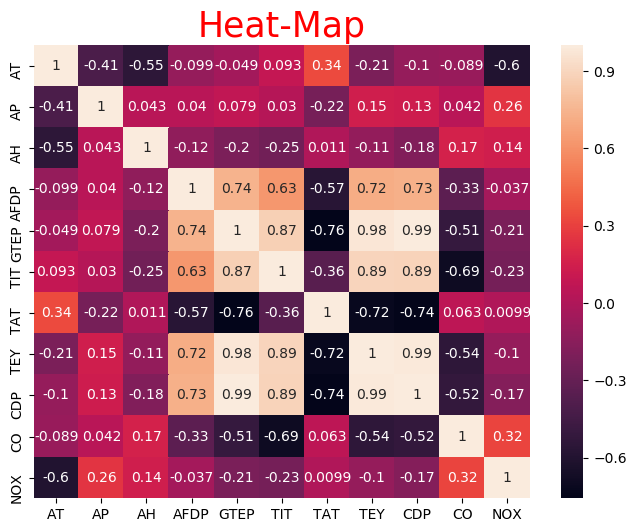

In [7]:
plt.figure(figsize=(8,6),dpi=100)
sns.heatmap(df.corr(),annot=True)
plt.ylim(11,0)
plt.title("Heat-Map",fontsize=25,color='red');

### Lets plot some highly correlated feature

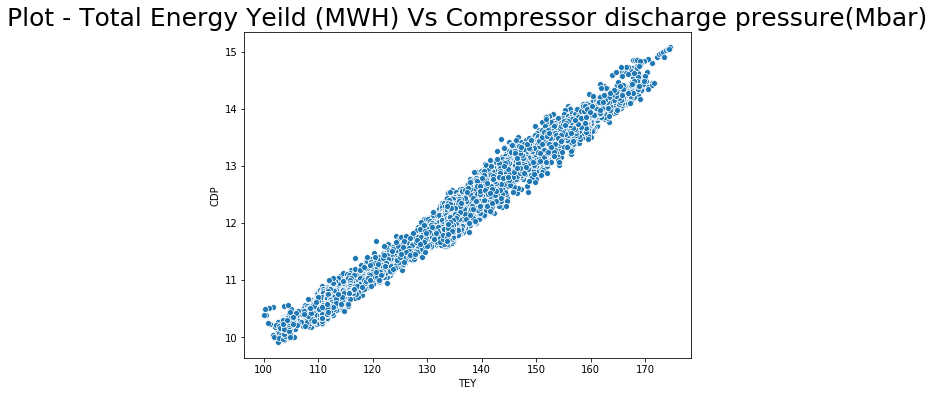

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='TEY',y='CDP',data=df)
plt.title("Plot - Total Energy Yeild (MWH) Vs Compressor discharge pressure(Mbar)",fontsize=25);

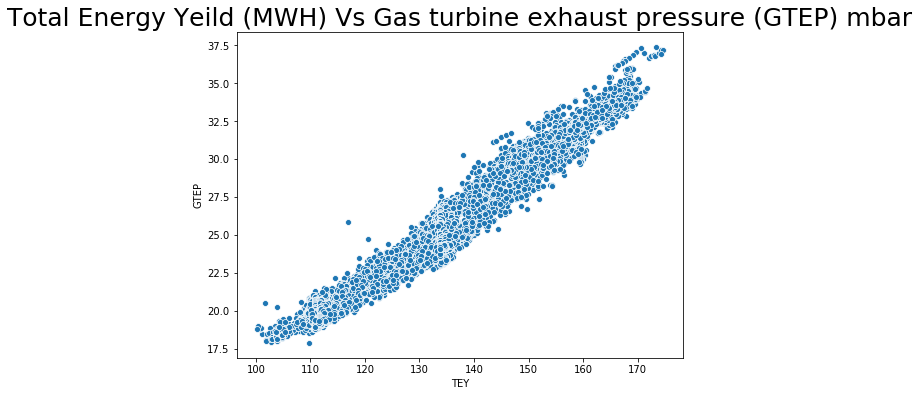

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='TEY',y='GTEP',data=df)
plt.title("Total Energy Yeild (MWH) Vs Gas turbine exhaust pressure (GTEP) mbar",fontsize=25);

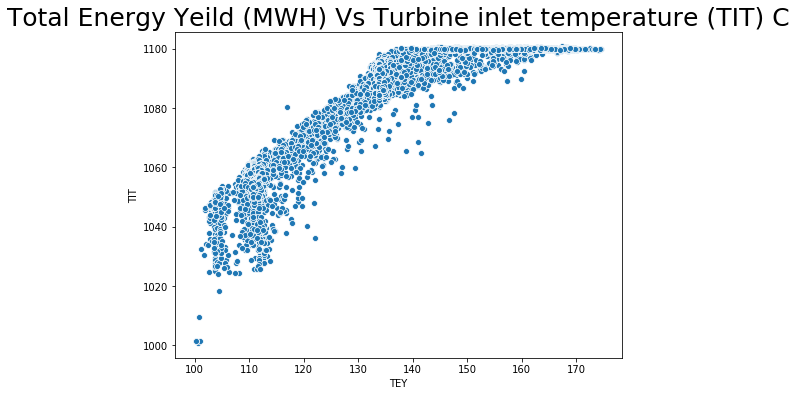

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='TEY',y='TIT',data=df)
plt.title("Total Energy Yeild (MWH) Vs Turbine inlet temperature (TIT) C",fontsize=25);

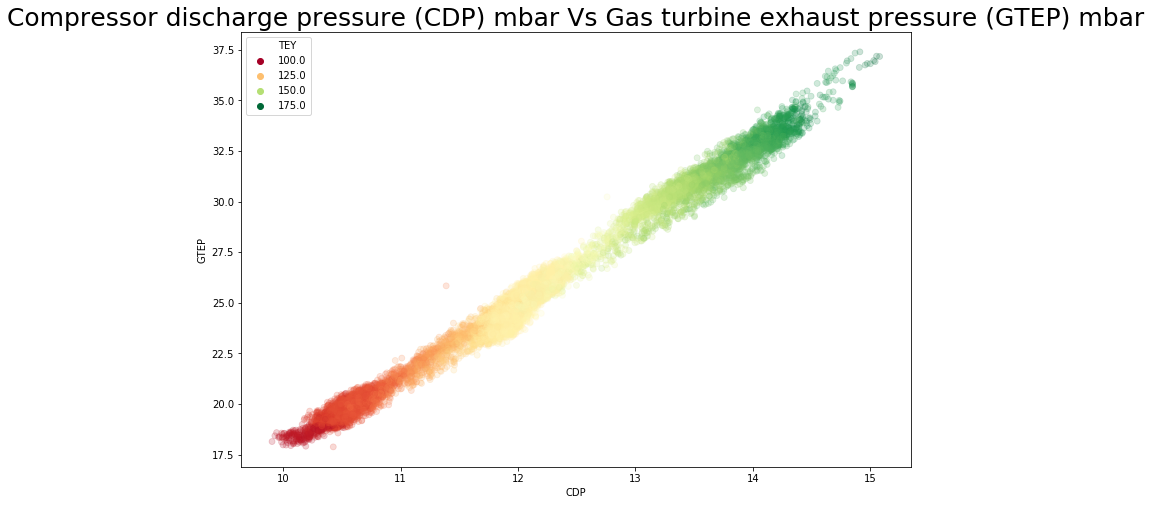

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='CDP',y='GTEP',
                data=df,hue='TEY',
                palette='RdYlGn',edgecolor=None,alpha=0.2)
plt.title("Compressor discharge pressure (CDP) mbar Vs Gas turbine exhaust pressure (GTEP) mbar",fontsize=25);

### The above graph shows that as CDP and GTEP increases Total Engery Yeild also increases

#### Preparing Data for Model

In [12]:
X = df.drop('TEY',axis=1)
y = df['TEY']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train.shape

(10527, 10)

In [19]:
X_test.shape

(4512, 10)

### Creating Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation
from tensorflow.keras.optimizers import Adam

In [21]:
model = Sequential()

In [22]:
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [23]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=200)

Epoch 1/200
83/83 [==============================] - 1s 5ms/step - loss: 18159.0684 - val_loss: 18013.2773
Epoch 2/200
83/83 [==============================] - 0s 2ms/step - loss: 17660.8438 - val_loss: 17020.1387
Epoch 3/200
83/83 [==============================] - 0s 2ms/step - loss: 15469.6992 - val_loss: 13142.2598
Epoch 4/200
83/83 [==============================] - 0s 2ms/step - loss: 9666.5986 - val_loss: 5709.4722
Epoch 5/200
83/83 [==============================] - 0s 2ms/step - loss: 2708.7610 - val_loss: 616.3030
Epoch 6/200
83/83 [==============================] - 0s 2ms/step - loss: 202.9032 - val_loss: 70.1159
Epoch 7/200
83/83 [==============================] - 0s 2ms/step - loss: 66.3834 - val_loss: 65.1794
Epoch 8/200
83/83 [==============================] - 0s 2ms/step - loss: 63.7268 - val_loss: 63.1730
Epoch 9/200
83/83 [==============================] - 0s 2ms/step - loss: 61.6594 - val_loss: 61.0992
Epoch 10/200
83/83 [==============================] - 0s 2ms/step

83/83 [==============================] - 0s 2ms/step - loss: 1.0719 - val_loss: 0.9988
Epoch 82/200
83/83 [==============================] - 0s 2ms/step - loss: 1.0134 - val_loss: 0.9429
Epoch 83/200
83/83 [==============================] - 0s 1ms/step - loss: 0.9693 - val_loss: 0.8968
Epoch 84/200
83/83 [==============================] - 0s 2ms/step - loss: 0.9305 - val_loss: 0.8529
Epoch 85/200
83/83 [==============================] - 0s 2ms/step - loss: 0.8880 - val_loss: 0.8131
Epoch 86/200
83/83 [==============================] - 0s 2ms/step - loss: 0.8595 - val_loss: 0.8042
Epoch 87/200
83/83 [==============================] - 0s 2ms/step - loss: 0.8270 - val_loss: 0.7568
Epoch 88/200
83/83 [==============================] - 0s 2ms/step - loss: 0.8072 - val_loss: 0.7321
Epoch 89/200
83/83 [==============================] - 0s 2ms/step - loss: 0.7966 - val_loss: 0.7120
Epoch 90/200
83/83 [==============================] - 0s 2ms/step - loss: 0.7820 - val_loss: 0.7190
Epoch 91/200


83/83 [==============================] - 0s 2ms/step - loss: 0.6934 - val_loss: 0.6139
Epoch 163/200
83/83 [==============================] - 0s 2ms/step - loss: 0.7093 - val_loss: 0.6390
Epoch 164/200
83/83 [==============================] - 0s 2ms/step - loss: 0.6931 - val_loss: 0.6872
Epoch 165/200
83/83 [==============================] - 0s 2ms/step - loss: 0.6847 - val_loss: 0.7127
Epoch 166/200
83/83 [==============================] - 0s 2ms/step - loss: 0.6920 - val_loss: 0.6165
Epoch 167/200
83/83 [==============================] - 0s 2ms/step - loss: 0.6751 - val_loss: 0.6204
Epoch 168/200
83/83 [==============================] - 0s 2ms/step - loss: 0.6744 - val_loss: 0.6869
Epoch 169/200
83/83 [==============================] - 0s 2ms/step - loss: 0.6815 - val_loss: 0.6079
Epoch 170/200
83/83 [==============================] - 0s 2ms/step - loss: 0.6810 - val_loss: 0.6773
Epoch 171/200
83/83 [==============================] - 0s 2ms/step - loss: 0.6994 - val_loss: 0.6275
Epoc

### Lets check losses in model and plot them to visualize 

In [24]:
losses = pd.DataFrame(model.history.history)

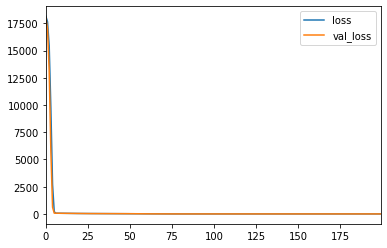

In [25]:
losses.plot()

### Evaluating Model Performance

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [27]:
predictions = model.predict(X_test)

In [28]:
mean_absolute_error(y_test,predictions)

0.6190940330721805

In [29]:
np.sqrt(mean_squared_error(y_test,predictions))

0.8133593953801581

In [30]:
explained_variance_score(y_test,predictions)

0.9975994199807691

Our model explains 99.75% variance in dataframe and has mean absolute error of 0.61 i.e prediction may vary by average of 0.61 MWH

In [31]:
df['TEY'].mean()

134.18846399361655

In [32]:
df['TEY'].median()

133.78

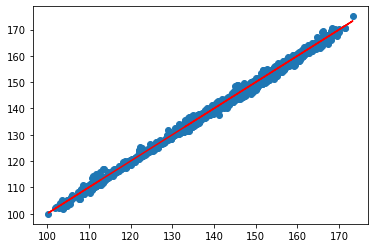

In [33]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

### Above plot show ours predictions are close to actual values

In [34]:
errors = y_test.values.reshape(4512,1) - predictions

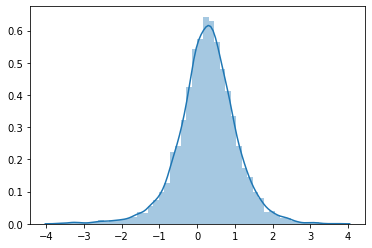

In [35]:
sns.distplot(errors)

### The above graph shows that errors are normally distributed most of the range between +1 to -1

#### Lets predict for new data and check results

In [36]:
new_data = df.drop('TEY',axis=1).iloc[15]

In [37]:
new_data = scaler.transform(new_data.values.reshape(-1,10))

In [38]:
new_data

array([[0.26673003, 0.66562825, 0.65904146, 0.35930258, 0.31074575,
        0.851     , 0.98110732, 0.37291359, 0.03225036, 0.49664799]])

In [39]:
model.predict(new_data)

array([[133.64285]], dtype=float32)

In [40]:
df.iloc[5]

AT         7.6998
AP      1010.7000
AH        92.7080
AFDP       3.5236
GTEP      19.6830
TIT     1059.8000
TAT      549.9700
TEY      114.7200
CDP       10.6260
CO         3.4467
NOX       82.4090
Name: 5, dtype: float64

Our predicted value is 133.64 MWH while original value is 114.72 MWH